# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
def load_data(file_path):
    """
    Parameters:
    file_path (str): The path to the CSV file to load.
    Purpose:
    To load customer data from a CSV file and extract a feature matrix.
    Return:
    Optional[np.ndarray]: A NumPy array containing the feature matrix, or None if an error occurs.
    """
    try:
      df = pd.read_csv(file_path)
      X = df.iloc[:, 3:].values
      return X
    except Exception as e:
      print(f"Error loading data: {e}")
      return None

X = load_data('Mall_Customers.csv')

In [5]:
def print_samples(X, n_samples=5):
    """
    Parameters:
    X (np.ndarray): The feature matrix for clustering.
    num_samples (int): The number of samples to print.
    Purpose:
    Print a few samples from the dataset to understand its structure.
    Return:
    None
    """
    if X is not None:
        print("Sample data points:")
        print(X[:n_samples])
    else:
        print("No data to display.")

print_samples(X, 15)


Sample data points:
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]
 [19 14]
 [19 99]
 [20 15]
 [20 77]
 [20 13]]


## Using the elbow method to find the optimal number of clusters

In [6]:
from sklearn.cluster import KMeans
def calculate_wcss(X, n_clusters):
  """
  Parameters:
  X (np.ndarray): The feature matrix for clustering.
  num_clusters (int): The number of clusters to test.
  Purpose:
  Calculates the Within-Cluster Sum of Squares (WCSS) for a range of clusters
  to be used for the Elbow Method.
  Returns:
  list[float]: The WCSS of squares for each number of clusters.
  """
  wcss = []
  for i in range(1, n_clusters + 1):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)
  return wcss

wcss = calculate_wcss(X, 10)


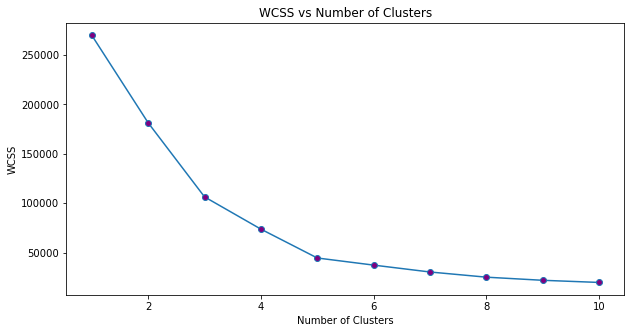

In [9]:
def print_wcss(wcss, n_clusters=10):
    """
    Parameters:
    wcss (list[float]): The within-cluster sum of squares for each number of clusters.
    n_clusters (int): The number of clusters to plot.
    Purpose:
    Plots the WCSS values to help visualize clustering performance and identify the elbow.
    Return:
    None
    """
    if wcss:
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, n_clusters + 1), wcss, marker='o', markerfacecolor='purple')
        plt.title("WCSS vs Number of Clusters")
        plt.xlabel("Number of Clusters")
        plt.ylabel("WCSS")
        plt.show()
    else:
        print("No WCSS values to display.")

print_wcss(wcss, 10)




## Training the K-Means model on the dataset

In [10]:
def train_kmeans(X, n_clusters):
    """
    Parameters:
    X (np.ndarray): The feature matrix for clustering.
    n_clusters (int): The number of clusters to form.
    Purpose:
    Train a K-Means clustering model and assign cluster labels to each data point.
    Returns:
    tuple (KMeans, np.ndarray): The trained K-Means model object and the cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    return kmeans, y_kmeans

kmeans, y_kmeans = train_kmeans(X, 5)

In [11]:
kmeans

KMeans(n_clusters=5, random_state=42)

## Visualising the clusters

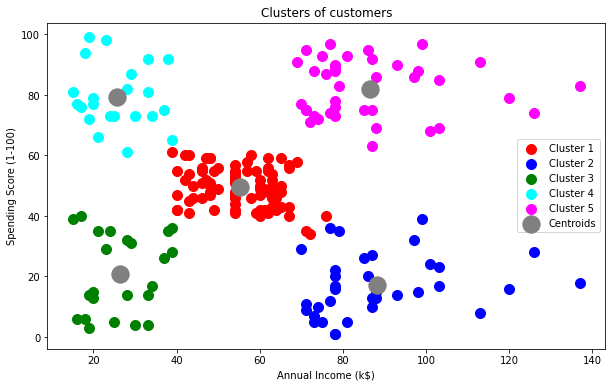

In [12]:
def print_kmeans_clusters(kmeans, y_kmeans):
    """
    Parameters:
    kmeans: KMeans - The trained K-Means model.
    y_means: np.ndarray - The cluster centers.
    Purpose:
    Print the cluster centers and the labels assigned to each data point.
    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'grey', label = 'Centroids')
    plt.title('Clusters of customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

print_kmeans_clusters(kmeans, y_kmeans)
